<font size=7><b> Introduction to Electrophysiology

This notebook will teach you the basics of analyzing [electrophysiology](https://en.wikipedia.org/wiki/Electrophysiology) data. In this homework we will perform some analysis on the data that Prof. Tal Sharf presented on Wednesday (April, 17). Prof. Sharf's experiment was done to determine the affects of a drug called [diazepam](https://en.wikipedia.org/wiki/Diazepam), on [cerebral organoids](https://en.wikipedia.org/wiki/Cerebral_organoid#:~:text=A%20cerebral%20organoid%2C%20or%20brain,over%20a%20course%20of%20months.). 



<font color="red"><b>Note:</b> This homework will be due April 18th at 11:59pm PT.  Make sure to complete the exercises at the bottom of this notebook.

In [6]:
%run "electrophysiology_source_code.ipynb"

# <font color="gray"> Reading Material

<font color="red"> Required Reading:
* [Professor Sharf's paper on Neural Circuitry](reading_material/Tal_Neural_Circuitry.pdf)
* [Spike Time Tiling Introduction](./reading_material/Spike_Time_Tiling.pdf)

Briskly read through [Professor Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf). Some of the exercises require you to read the first few pages. [This paper's](./reading_material/Spike_Time_Tiling.pdf) discussion on Spike Time Tilling is also required reading. [braingeneerspy](https://github.com/braingeneers/braingeneerspy) is the name of the python package used by the Haussler lab for data analsyis. We will be using the [analysis toolkit](https://github.com/braingeneers/braingeneerspy/tree/master/src/braingeneers/analysis) from that package..

**Other Material**
* Wiki Articles:
    * Basic wiki articles on [electrophysiology](https://en.wikipedia.org/wiki/Electrophysiology) , [diazepam](https://en.wikipedia.org/wiki/Diazepam) , [cerebral organoids](https://en.wikipedia.org/wiki/Cerebral_organoid#:~:text=A%20cerebral%20organoid%2C%20or%20brain,over%20a%20course%20of%20months.), [action potential](https://en.wikipedia.org/wiki/Action_potential)
    * Scholarpedia article on [Spike train analysis](http://www.scholarpedia.org/article/Measures_of_spike_train_synchrony)
* Research Papers
    * Review paper on [cerebral organoids](./reading_material/rise_of_organoids.pdf)
    * Professor  [Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf)
    * [Spike Time Tilling](./reading_material/Spike_Time_Tiling.pdf) paper



#  Spike Trains

## Spike Train

A "spike train" (or "spike raster") is an incredibly powerful tool used to analyze neural data. In this notebook you will learn to do some basic analysis on spike train data. A spike train is a 2D matrix where each row represents a neuron, and each column is a single moment in time. Each blue dot in the matrix is a moment in time where a neuron emits a signal to other neurons. This signal can be called a "spike", a "fire", or, more scientifically, an "action potential".


When you look at a spike train, you see every single moment at which a neuron "fires". [This link](http://www.scholarpedia.org/article/Measures_of_spike_train_synchrony) is a great resource if you want to take a deeper dive into spike train analysis. Below is the complete spike raster for the control dataset from the the experiment, `Spike_Raster_Control.mat`.

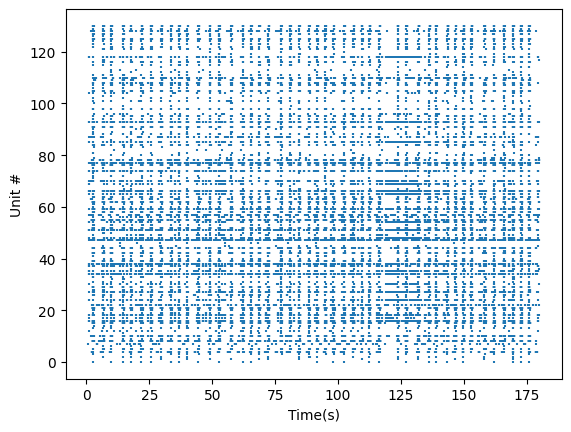

In [2]:
plot_raster(data_control)

## Analysing the Train

When scientists analyze spike trains, they are especially interested in looking at the "neural bursts" that occur. A burst is defined a short window of activity where the neurons are especially active. Looking at the spike raster above you might be able to pick out the neural bursts (the "veritcal lines"), however, bursts are easier to distinguish when you zoom in on the dataset.  

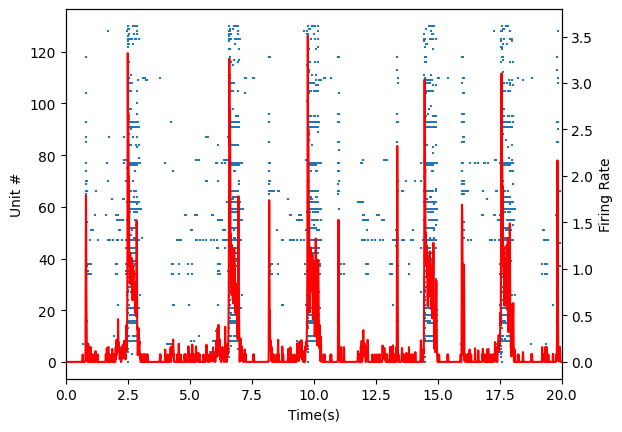

In [3]:
raster_analysis(data_control)

In the example above we have zoomed in on the first 20 seconds of the spike raster shown above. This raster also contains a red line that show the relative activity of neurons at that timestep. Looking at this 20 second window, I see **5** bursts. Defining a burst can be a little tricky. Notice that there are also areas of small activity in between bursts. Below I highlight where I see bursts and areas of activity in the spike raster.

![alt text](.images/burst_analysis.png "Title")

Neuroscientists are interested in bursts not just because they are the areas of most activity, but most importantly, because these regions display repeated patterns of consistent relationships between neurons. Below we zoom in even more on to the first two bursts of the spike raster (8 second window). Notice that the neural activity pattern (red line) looks similar for both bursts. Also, if you look at individual neurons (blue dots) you'll see that they follow similar firing patterns within both bursts.

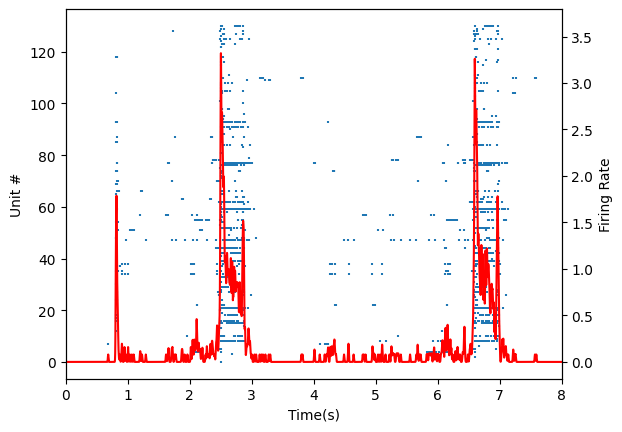

In [4]:
raster_analysis(data_control, seconds=8)

# Neural Relationships

To build the type of beautiful circuit diagrams that were discussed in class, scientists must work backwards by analyzing the firing patterns they see from neurons in the brain. They use different tools to parse out the relationship between neurons.

## Interspike Intervals

Before we attempt to answer the complicated question of "what is the relationship patterns between different neurons?", lets start with a much simpler question: "what is the relationship pattern between a single neuron and itself?". In other words, what properties can we say about the firing pattern of a single neuron?

This is a more complicated question than it might at first seem. Neurons follow a somewhat random behaviour, it is not always certain when, or how often, a neuron will fire. Lets take a "data first" approach to gain a better understanding of when neurons fire. We are going to consider the interval of time that passes in between each moment a neurons fires, this is called the interspike interval. Here is a [brief summary](https://www.tau.ac.il/~tsirel/dump/Static/knowino.org/wiki/Interspike_interval.html#:~:text=The%20interspike%20interval%20is%20the,messengers%20to%20affect%20other%20neurons.) of interspike intervals. Below we see a histogram of the interspike interval for all the neurons in our spike raster from above. What probability distribution does the graph below look like?

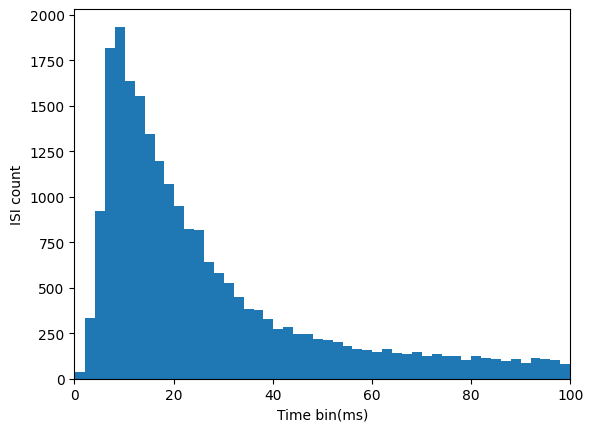

In [5]:
interspike(data_control)

<p>&nbsp</p>

<center><b>Example of Interspike Intervals</b></center>

![alt text](https://www.tau.ac.il/~tsirel/dump/Static/knowino.org/w/images/thumb/3/38/Spiketimes.png/300px-Spiketimes.png)

The mathematicians in the group will be delighted to know that intervals between spikes for a neuron tend to follow a [poission distribution](https://en.wikipedia.org/wiki/Poisson_distribution). This is not a coincidence, read the wiki article to understand why. Many of the beautiful (and complicated) statistical models used to describe the circuit patterns between neurons use the poission distribution as the fundemental building block of more complicated algorithms.

## Correlation Matrix

We have just shown that we can consider each neuron to act as a random variable, with a poission probability of firing at any given time. Given that we are now working with random variables, it is natural to use a correlation matrix to measure the relative strength in relationship between neurons. A correlation matrix displays the correlation between every pair of neurons in our spike raster. 

Below is a correlation matrix created from the spike raster above. Postively correlated neurons show up as a green dot in the plot, where negatively correlated neurons are deep blue. One could imageine strongly correlated neurons as being part of the same cicuit, or even touching. Where negatively correlated neurons may perhaps display some inhibitory cell stopping other neurons from firing. The true interpretation of a correlation matrix is much more vague than this. In reality, more nuanced techniques are used to tease apart cell circuitry. However, as the homework will show, the correlation matrix is still useful for discerning changes in neural behaviour.

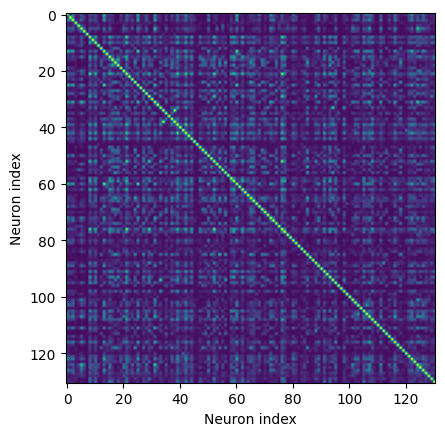

In [6]:
correlation(data_control)       

<p>&nbsp</p>
<center><b>Summary of Correlation</b></center>

![alt text](https://www.mathsisfun.com/data/images/correlation-examples.svg)

# <font color="red">Exercises

The exercises below will provide you with a better understanding of how neural data is analyzed. Note, when completing these exercises, please remember to show your work. If you typed any code to find a solution, please write down your code.

## Prof. Sharf's Paper (5 Points Total)

Read through the first few pages of [Professor Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf). Then answer the following questions.

### Breakthrough Device (3 Points)

What newly developed device has enabled high-resolution readouts of neural activity? What is the name of the specific device (model/maker) used in this paper? How many electrodes can it record from simultaneously?

<font color="green"><b>Answer

- Complementary metal-oxide-semiconductor (CMOS)-based microelectrode array (MEA) technology has enabled high-resolution readouts of neural activity.

- The name of specific device used in this paper is called MaxOne from Maxwell Biosystems, Zurich, Switzerland.

- The MaxOne can record up to 1024 electrodes simultaneously.

### Organoid Models (2 Points)

How long was neural activity recorded for after the cerebral organoid was placed on the recording device? What is the name of 2 drugs that were used to change the neural activity of organoids in the experiment?

<font color="green"><b>Answer

- After the cerebral organoid was placed on the recording device, the neural activity was recorded for 6 months.

- The name of 2 drugs used to change the neural activity of organoids in the experiments are Diazepam and Tetrodotoxin. In addition, NBQX, R-CPP, and gabazine were also used.

## Curating Raw Data (2 Points Total)

When a neuron emits a signal to other cells, it can be called a "spike", a "fire", or, more scientifically, an "action potential". The spike raster that you saw in the lecture above is the final product from considerable work done on the "raw data" recorded from electrodes. A microscopic 2D grid of electrodes calledn an [MEA](https://ars.els-cdn.com/content/image/1-s2.0-S0165027099001132-gr1.jpg) records an "action potential" across multiple locations of the neuron's body. This [wiki article](https://en.wikipedia.org/wiki/Action_potential), gives a good example of what an action potential looks like. A major step in the process of finding neurons from raw data, involves looking at "footprints" of action potentials from prospective neurons. These "footprints" are representative 2D depictions of raw data coming from electrods on the MEA. The **4** images below are footprints of prospective neurons.



For the **4** images below, classify them as either being an "action potential" or as being "noise". When determinning if a "neural footprint" is a spike or noise, consider the following-  The "spike" should be seen across multiple electrodes, furthermore, the neuron should remain consistent across multiple electrodes. There shouldn't be any significant changes in it's appearance.

<font color="orange"><b>Hint:</b> **2** of the images below are action potentials, and the other **2** are noise.

<font color="green"><b>Answer

<b>Image 1:</b>

- Action potential

<b>Image 2:</b>

- Noise

<b>Image 3:</b>

- Action potential

<b>Image 4:</b>

- Noise

<b><center>Image 1</center></b>
![alt text](.images/spike1.png "Title")

<b><center>Image 2</center></b>
![alt text](.images/spike2.png "Title")

<b><center>Image 3</center></b>
![alt text](.images/spike3.png "Title")

<b><center>Image 4</center></b>
![alt text](.images/spike4.png "Title")

## Analyzing Control Dataset (5 Points Total)

In this section we will calculate some summary statistics on the control dataset, `data_control`. `data_control` is a `SpikeData` object created using the [analysis package](https://github.com/braingeneers/braingeneerspy/blob/master/src/braingeneers/analysis/analysis.py) from the braingeneerspy python library.

### Basic Summary (3 Points)

Lets start my getting a basic summary of the spike raster, `data_control`. How many neurons are there in the recording? How long is the recording (in seconds)? In total, how many spikes occured across all neurons?

<font color="orange">**Hint:** While this question may at first appear oubvious, getting the answer with code may be harder than you expect. This is because `data_control` is coded as a sparse matrix to save on memory. One way of going about this answer is by looking at the variable `length` and some of the code inside of the `rates` function. Another approach is to use the function `raster` with bin size of 1.


<font color="green"><b>Answer

In [29]:
raster_control = data_control.raster(bin_size=1)

# number of neurons
n_neurons = raster_control.shape[0]
print(f'Number of neurons: {n_neurons}')

# plot to get length of recording
recording_length_sec = raster_control.shape[1] / 1000 # convert milliseconds to seconds
print(f"Recording length: {recording_length_sec:.2f} seconds")

# sum all spikes from each neuron (non-zero indices)
total_spikes = np.sum(raster_control)
print(f"Total number of spikes: {total_spikes}")

Number of neurons: 131
Recording length: 179.88 seconds
Total number of spikes: 31756


### Calculate Firing rate (1 Point)

The firing rate of a neuron is a measure of how often the cell fires. It is defined as the total number of spikes divided by total time (in seconds):

$$
\dfrac{\text{spikes}}{\text{time}}
$$

What is the average firing rate for a single neuron in the control dataset?

<font color="orange">**Note:** Here we are asking for the number of spike per second per neuron- aka: the firing rate of the entire recording divided by the number of neurons in the recording.

<font color="green"><b>Answer

In [89]:
avg_firing_rate = total_spikes / recording_length_sec / n_neurons
print(f"Average firing rate for a single neuron in the control dataset: {avg_firing_rate:.2f} Hz")

Average firing rate for a single neuron in the control dataset: 1.35 Hz


### Calculate Coefficient of Variation (1 Point)

Given the interspike intervals (ISI's) of a dataset, the "Coefficient of Variation" (CV) is defined as the standard deviation of the ISI's divided by the mean.

$$
\dfrac{\text{sd}\begin{pmatrix}\text{ISI}\end{pmatrix}}{\text{mean}\begin{pmatrix}\text{ISI}\end{pmatrix}}
$$

In neuroscience the CV is commonly used as a measure of randomness in the dataset. A CV of of 1 means that the data folllows a more poission-like distribution. A smaller number for the CV tends to mean that the data is less random. Calculate the CV for the control dataset.

<font color="orange">**Hint:** Use the code inside of the `interspike` function for your ISI's, however, please make sure not to use the variable `isis_raw` when doing the CV calculation.

<font color="green"><b>Answer

In [24]:
ISI = data_control.interspike_intervals()
# look at first few neurons
print(ISI[0:2])

# calculate CV for each neuron
CVs = []
for isi_neuron in ISI:
    if len(isi_neuron) > 1:  # need at least 2 to calculate cv
        CV = np.std(isi_neuron) / np.mean(isi_neuron)
        CVs.append(CV)
    else:
        CVs.append(np.nan)

# conver to numpy array
CVs = np.array(CVs)

print(f"Mean CV across all neurons: {np.nanmean(CVs):.4f}")
print(f"Median CV across all neurons: {np.nanmedian(CVs):.4f}")
print(f"Min CV: {np.nanmin(CVs):.4f}")
print(f"Max CV: {np.nanmax(CVs):.4f}")

# distribution
print(f"Number of neurons with valid CV: {np.sum(~np.isnan(cvs))}")

[array([7.259350e+03, 4.710000e+03, 3.101850e+03, 4.291650e+03,
       3.738550e+03, 7.920400e+03, 5.850000e+00, 3.177800e+03,
       7.794450e+03, 8.086450e+03, 9.479450e+03, 3.239000e+03,
       2.632830e+04, 6.499900e+03, 4.212050e+03, 1.010195e+04,
       3.885700e+03, 1.066655e+04, 9.186550e+03, 2.611450e+03,
       4.671100e+03, 6.345100e+03, 1.195920e+04, 7.719000e+03,
       3.110550e+03, 3.163250e+03]), array([10219.2 ,  9004.45,  8554.8 , 11126.55,  3601.8 , 12289.9 ,
       24894.05, 14238.55,  8230.85, 14756.65, 11548.1 , 11334.45])]
Mean CV across all neurons: 1.5094
Median CV across all neurons: 1.2053
Min CV: 0.0576
Max CV: 4.8903
Number of neurons with valid CV: 130


## Analyzing Diazepam Dataset (11.5 Points Total)

In this section we will analyze the results from the cerebral organoid after it was given the drug Diazepam. Specifically, we will be comparing these results the control data to see what affects diazepam has on the tissue.

<font color="orange">**Hint:** When answering the questions below, it's important to remember the general affect that Diazepam has on neurons. In general, diazepam **decreases neural activity**, however, firing patterns between neurons become **more organized** and less random. 

### Load Data (1 Point)

Create a variable called `data_diazepam` which loads the data from `Spike_Raster_Diazepam.mat` into a Braingeneerspy `SpikeData` object. Note, this is the same way we load the control dataset in the source code.

<font color="green"><b>Answer

In [7]:
data_diazepam = mat_to_spikeData('/home/jovyan/data/ephys/2023-08-28-e-Math_Mind_Class/HW2-Electrophysiology/Spike_Raster_Diazepam.mat')

### Basic Summary (3 Points)

For the dataset, `data_diazepam`, calculate how many neurons there are, how long the recording is (in seconds), and the total number of spikes that occured.

<font color="green"><b>Answer

In [30]:
raster_diazepam = data_diazepam.raster(bin_size=1)

# number of neurons
n_neurons_diazepam = raster_diazepam.shape[0]
print(f'Number of neurons: {n_neurons_diazepam}')

# plot to get length of recording
recording_length_sec_diazepam = raster_diazepam.shape[1] / 1000 # convert milliseconds to seconds
print(f"Recording length: {recording_length_sec_diazepam:.2f} seconds")

# sum all spikes from each neuron (non-zero indices)
total_spikes_diazepam = np.sum(raster_diazepam)
print(f"Total number of spikes: {total_spikes_diazepam}")

Number of neurons: 131
Recording length: 179.99 seconds
Total number of spikes: 20971


### Firing Rate (1 Point)

What is the average firing rate for a single neuron in the diazepam dataset?  How does this compare to the control dataset? Is this consistent with what we expect from Diazepam?

<font color="orange">**Note:** Like before, we are asking for the number of spike per second per neuron

<font color="green"><b>Answer

In [32]:
avg_firing_rate_diazepam = total_spikes_diazepam / recording_length_sec_diazepam / n_neurons_diazepam
print(f"Average firing rate for a single neuron in the control dataset: {avg_firing_rate_diazepam:.2f} Hz")

Average firing rate for a single neuron in the control dataset: 0.89 Hz


The average firing rate for the Diazepam dataset (0.89 Hz) is lower than the control dataset (1.35 Hz). This is consistent with what we expect from Diazepam since it generally decreases neural activity.

### Calculate Coefficient of Variation (1 Point)

Calculate the CV score for Diazepam dataset. Compare your result to the control dataset. Is this result consistent with the general affects we expect from Diazepam?

<font color="green"><b>Answer

In [34]:
ISI_diazepam = data_diazepam.interspike_intervals()
# look at first few neurons
print(ISI_diazepam[0:2])

# calculate CV for each neuron
CVs = []
for isi_neuron in ISI_diazepam:
    if len(isi_neuron) > 1:  # need at least 2 to calculate cv
        CV = np.std(isi_neuron) / np.mean(isi_neuron)
        CVs.append(CV)
    else:
        CVs.append(np.nan)

# conver to numpy array
CVs = np.array(CVs)

print(f"Mean CV across all neurons: {np.nanmean(CVs):.4f}")
print(f"Median CV across all neurons: {np.nanmedian(CVs):.4f}")
print(f"Min CV: {np.nanmin(CVs):.4f}")
print(f"Max CV: {np.nanmax(CVs):.4f}")

# distribution
print(f"Number of neurons with valid CV: {np.sum(~np.isnan(cvs))}")

[array([4.92430e+03, 3.37115e+03, 2.29285e+03, 2.21975e+03, 7.22385e+03,
       4.63750e+03, 6.62735e+03, 2.49870e+03, 2.19105e+03, 2.10715e+03,
       2.42510e+03, 2.71200e+02, 2.17640e+03, 4.65895e+03, 3.60000e+00,
       7.72460e+03, 4.55015e+03, 7.65740e+03, 2.13265e+03, 2.42600e+03,
       7.78325e+03, 2.30770e+03, 2.19860e+03, 9.14845e+03, 4.77275e+03,
       4.15750e+03, 2.66405e+03, 3.18315e+03, 2.22745e+03, 6.67215e+03,
       7.84140e+03, 2.14635e+03, 2.08955e+03, 2.44770e+03, 2.42770e+03,
       2.68680e+03, 1.82961e+04, 2.31455e+03, 5.94830e+03, 1.98995e+03,
       2.70865e+03, 7.51815e+03]), array([15954.7 ,  5600.85, 38289.  , 55641.45,  6189.15,  2099.8 ,
       12730.5 ,  5118.1 ,  2341.6 ])]
Mean CV across all neurons: 1.0994
Median CV across all neurons: 0.9753
Min CV: 0.1274
Max CV: 2.8492
Number of neurons with valid CV: 130


Yes, the CV is lower which means the firing rate becomes more organized and less random which is consistene with the expected effects of Diazepam

### Bursting Behaviour (4 Points)

#### Macro

Create a zoomed in plot of the spike raster for the diazepam dataset that shows the first 20 seconds of the recording. How many bursts do you see? How does this compare to the number of bursts you saw in the control dataset? Are these results consistent with figures in Tal's paper? If so, which figure?

<font color="green"><b>Answer

There are 8 bursts in the first 20 seconds of the Diazepam dataset. This is more bursts compared to the control dataset. These results are consistent with Figure 1.d in Tal's paper

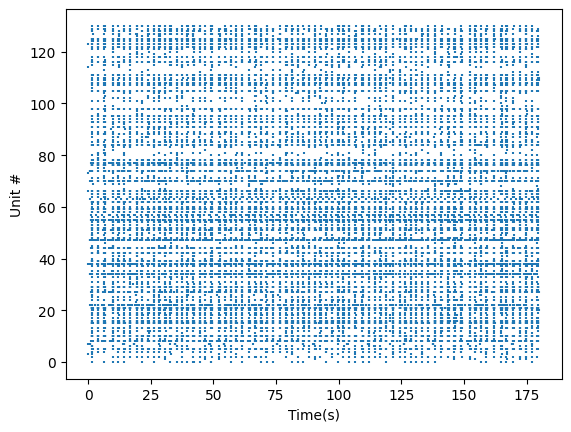

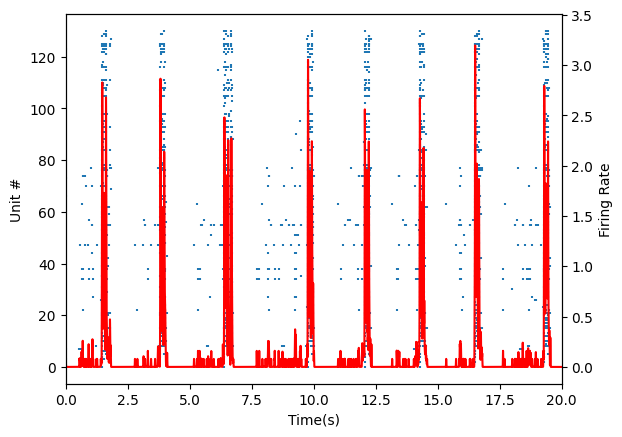

In [16]:
plot_raster(data_diazepam)
raster_analysis(data_diazepam)

#### Micro

Create a graph that zooms in on the first **2** bursts from the Diazepam dataset. Compare this to the first **2** bursts of the control dataset. Inside of a burst do the neural acivity patterns look different? If so how?

<font color="green"><b>Answer

Yes, they do look different. In the control dataset, the neural activity pattern inside the burst closely represents a Poisson distribution. However, in the Diazepam dataset, the neural activity pattern inside the burst is more synchronized. These are expected effects of Diazepam as it reduces the CV, leading to less firing but more organization.

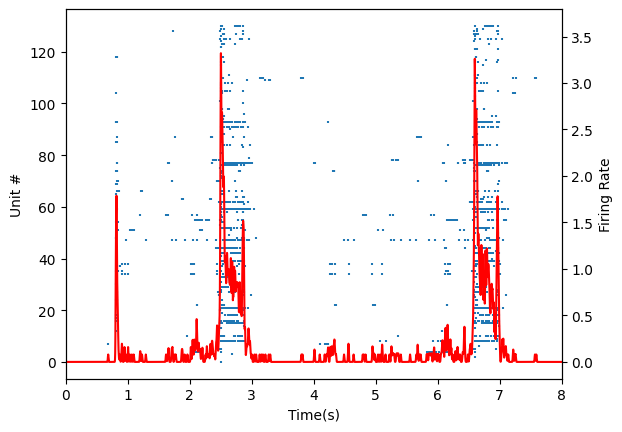

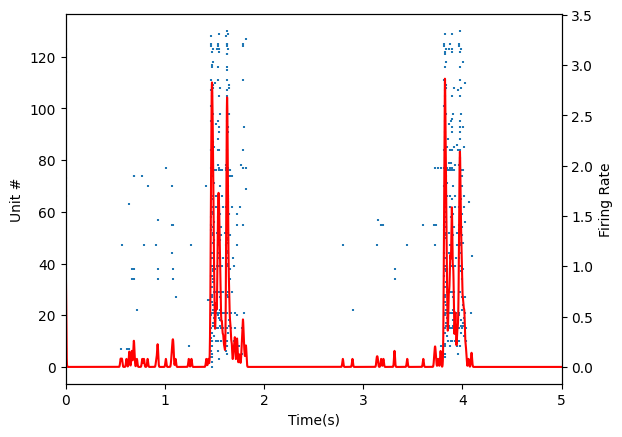

In [41]:
raster_analysis(data_control, seconds=8)
raster_analysis(data_diazepam, seconds=5)

### Replicate Correlation and ISI (1.5 Points) <font color="green"> 

Plot the correlation matrix and the ISI histogram for the diazepam dataset. Briefly compare these plots to those from the control dataset.

<font color="green"><b>Answer

In the correlation matrices, both are quite similar but there are more green dots than blue dots in the Diazepam dataset. Since postively correlated neurons show up as green dots and negatively correlated neurons show up as blue dots, we can make the observation that these positively correlated neurons are being activated at the same time as a result of the Diazepam drug, which causes more synchronized firing.

data_diazepam


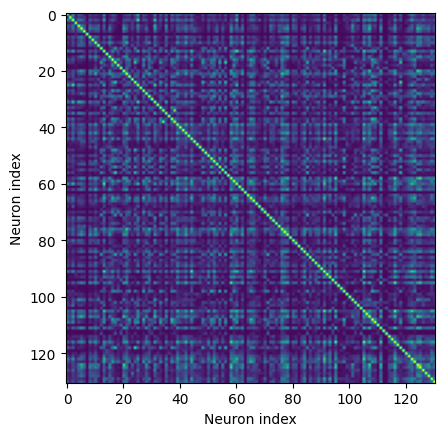

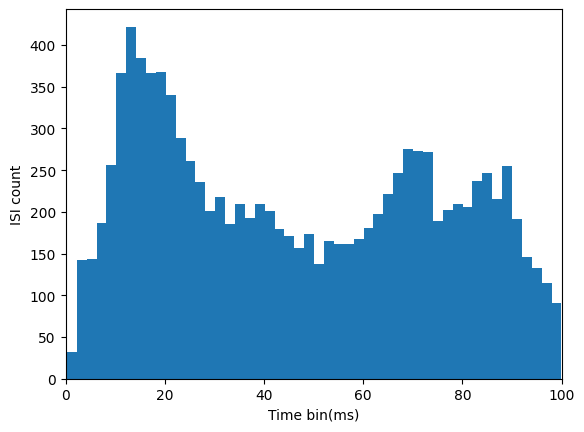

data_control


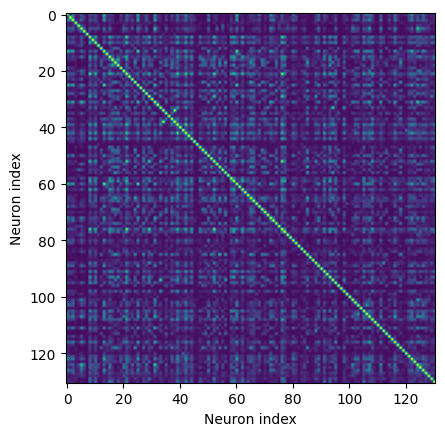

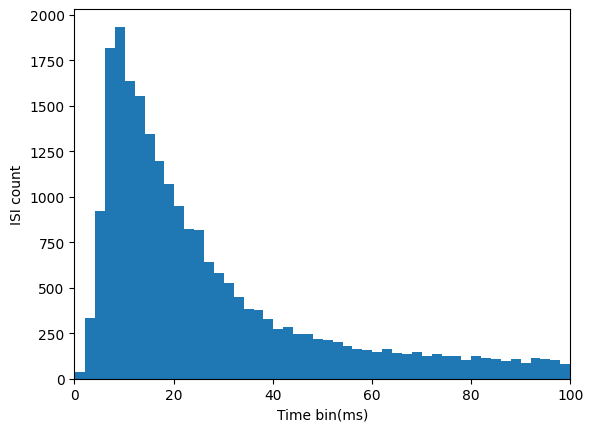

In [48]:
print('data_diazepam')
correlation(data_diazepam)
interspike(data_diazepam)

print('data_control')
correlation(data_control)
interspike(data_control)

## Correlation & Spike Time Tilling (9.5 Points)

### Correlation Matrix Equation

Given a matrix $X$, with $n$ random variables as its rows, write down the formula that the correlation matrix

<font color="green"><b>Answer

$ C = \frac{1}{m-1} \hat{X} \hat{X}^T $, where m is the number of columns and $\hat{X}$ is the mean subtracted matrix

### Diagonal of Correlation Matrix (1 Point)

What are the values on the diagonal of the correlation matrix? Why?

<font color="orange">**Hint:** If you need to, you can check the values of the diagonal in the source code. This is not necessary to receive full credit though.

<font color="green"><b>Answer

In [ ]:
spike_count_matrix = data_diazepam.raster(bin_size=1)

# calculate the correlation matrix
correlation_matrix = np.corrcoef(spike_count_matrix)

# get diagonal of the correlation matrix
diagonal = np.diag(correlation_matrix)

print(f"Diagonal values: {diagonal}")

Diagonal values: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


The values of the diagonal of the correlation matrix are all 1 because this means each variable perfectly correlates with itself, which is expected.

### Why STTC? (1.5 Points)

Briefly read through the paper on [spike time tilling](./reading_material/Spike_Time_Tiling.pdf). For electrophysiology, what is the advantage of using spike time tiling over correlation?

<font color="green"><b>Answer

The advantage of using spike time tiling over correlation is that it provides a better correlation metric as it does two main things:
- not confounded by firing rate: correlation index is strongly dependent on firing rate, giving higher values for neurons with low firing rates even when the actual correlation structure is identical
- is properly bounded: fixed ranged between -1 and +1

### Plot STTC (2 Points)

Use the braingeneerspy package's [analysis code](https://github.com/braingeneers/braingeneerspy/blob/master/src/braingeneers/analysis/analysis.py) to create a plot of the STTC for both the control dataset and the diazepam dataset. 

<font color="orange"><b>Hint:</b> This is the same package used in the source code to create the other plots. You only need to write 2 lines of code to complete this exercise. In the code, by default `delt=20`, leave it that way.

<font color="green"><b>Answer

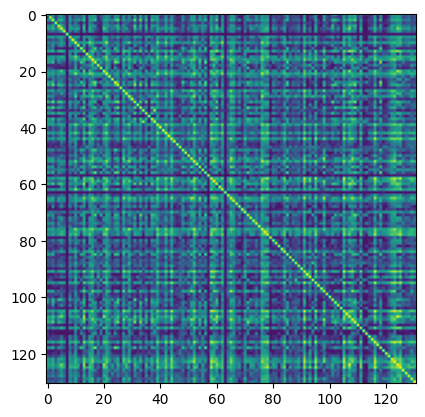

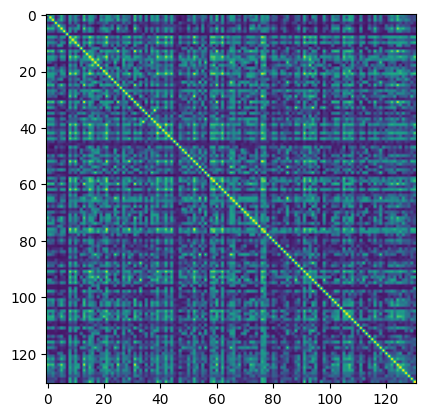

In [ ]:
# found spike_time_tiling and spike_time_tiling_coefficient implementation from older commit
# braingeneerspy/braingeneers/analysis/analysis.py: c69a761

# def spike_time_tilings(self, delt=20):
#         """
#         Compute the full spike time tiling coefficient matrix.
#         """
#         T = self.length
#         ts = [_sttc_ta(ts, delt, T) / T for ts in self.train]

#         ret = np.diag(np.ones(self.N))
#         for i in range(self.N):
#             for j in range(i + 1, self.N):
#                 ret[i, j] = ret[j, i] = spike_time_tiling(
#                     self.train[i], self.train[j], ts[i], ts[j], delt
#                 )
#         return ret


# def spike_time_tiling(self, i, j, delt=20):
#     '''
#     Calculate the spike time tiling coefficient between two units within
#     this SpikeData.
#     '''
#     return spike_time_tiling(self.train[i], self.train[j], delt, self.length)

sttc_diazepam = data_diazepam.spike_time_tilings() # get data_diazepam STTC
sttc_control = data_control.spike_time_tilings() # get data_control STTC

# plot
plt.imshow(sttc_diazepam)
plt.show()
plt.imshow(sttc_control)
plt.show()

### Compare Plots (1.5 Points)

Compare the two plots of the STTC. Does the variation between these plots make sense, considering our understanding of diazepam? Explain. Is the comparison between these two plots consistent with the variation you see between the correlation matrices of both datasets?

<font color="green"><b>Answer

The two plots of STTC now show more positively correlated neurons since it has more green points compared to the regular correlation matrix. This variation between these plots makes sense since Diazepam encourages neurons to fire synchronously. Thus, this is shown as more neurons are positively correlated. This comparison is consistent because in both the correlation matrix and STTC, the Diazepam dataset shows more synchronized firing as illustrated by more green points compared to the control dataset.

### Diagonal of STTC (1.5 Points)

What do the diagonal values of the STTC equal. Why is this the case?

<font color="green"><b>Answer

In [27]:
# get diagonal of the Diazepam STTC
diagonal_sttc_diazepam = np.diag(sttc_diazepam)

print(f"Diagonal Diazepam STTC values: {diagonal_sttc_diazepam}")

# get diagonal of the control STTC
diagonal_sttc_control = np.diag(sttc_control)

print(f"Diagonal Control STTC values: {diagonal_sttc_control}")

Diagonal Diazepam STTC values: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Diagonal Control STTC values: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


The diagonal values of the STTC matrices are all 1. This is consistent with what we see in the correlation matrix because we expect that the correlation of a variable should perfectly match itself.